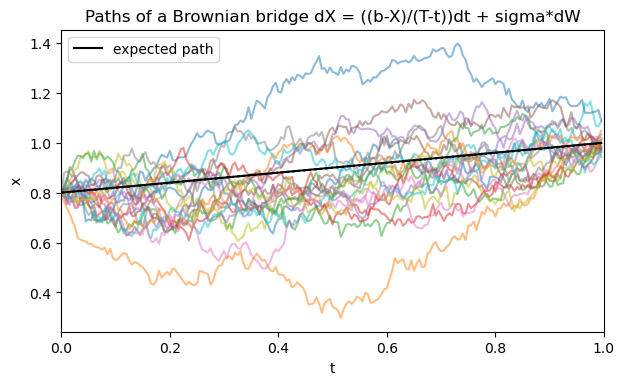

In [1]:
#!/usr/bin/python3
#Brownian_bridge_M1.ipynb
#Parth Parakh
#purpose: Simulate a Brownian bridge
#dX = (b-X)/(T-t)*dt + sigma*dW
#used in fixed rate bonds

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncx2
#----------------------------------------------------------------------

#Defining the parameters
npaths = 20000;           #number of paths
T = 1;                   #time horizon
nsteps = 200;            #number of time steps
dt = T/nsteps;           #time step
t = np.arange(0,T,dt);   #observation times
a = 0.8; b = 1; sigma = 0.3; #model parameters

# Allocate and initialise all paths (method 1)
#X = [a*np.ones(npaths).reshape(1,npaths); ; b*ones(npaths).reshape(1,npaths)];
X = np.zeros((nsteps)*npaths).reshape(nsteps,npaths);
X[0,:] = a;
X[-1,:] = b;

# Compute the Brownian bridge (method 1)
for i in range(0,nsteps-1):
     X[i+1,:] = X[i,:] + (b-X[i,:])/(nsteps-i+1) + sigma*np.sqrt(dt)*np.random.randn(1,npaths);

# Compute the expected path
EX = a + (b-a)/T*t;

# Plot the expected, mean and sample paths
plot1 = plt.figure(1,figsize=(7,4), dpi=100)
for i in range(0,20):
    plt.plot(t,X[:,i],alpha=0.5)
plt.plot(t,EX,'k', label = 'expected path')
plt.plot(t,np.mean(X,axis=1),':k');
#sdevinfty = sigma*np.sqrt(mu/(2*alpha));
#plt.ylim(-0.02,mu+4*sdevinfty)
plt.xlim(0,1)
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Paths of a Brownian bridge dX = ((b-X)/(T-t))dt + sigma*dW')
plt.show()